In [34]:
import os
import zipfile
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.utils import shuffle

In [35]:
#The path where the dataset was downloaded
dataset_path = './kaggle/input/digit-recognizer/'
zip_file_path = os.path.join(dataset_path, 'digit-recognizer.zip')

In [36]:
#Unziping the dataset
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(dataset_path)

In [37]:
#Loading the data into a pandas DataFrame
train_file_path = os.path.join(dataset_path, 'train.csv')
df = pd.read_csv(train_file_path)
print(df.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [38]:
data = pd.read_csv('./kaggle/input/digit-recognizer/train.csv')
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_test = data[0:1000].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [40]:
Y_train

array([7, 4, 6, ..., 1, 6, 1], dtype=int64)

In [41]:
#Function to display images and predictions
def display_images_with_predictions(X, Y, predictions, num_images=6):
    indices = np.random.choice(X.shape[1], num_images, replace=False)
    fig, axes = plt.subplots(1, num_images, figsize=(12, 3))
    for i, idx in enumerate(indices):
        axes[i].imshow(X[:, idx].reshape(28, 28), cmap='gray')
        axes[i].set_title(f"Prediction: {predictions[idx]} / Label: {np.argmax(Y[:, idx])}")
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

In [42]:
#Function to plot val_loss and val_acc
def plot_training_curves(train_losses, val_losses, val_accuracies):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(1, len(val_accuracies) + 1), val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Validation Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [161]:
class DenseLayer:
    def __init__(self, input_size, output_size, activation='linear'):
        self.W = np.random.randn(output_size, input_size) * 0.01
        self.b = np.zeros((output_size, 1))
        self.activation = activation

        # Adam specific parameters
        self.v_dW = np.zeros_like(self.W)
        self.s_dW = np.zeros_like(self.W)
        self.v_db = np.zeros_like(self.b)
        self.s_db = np.zeros_like(self.b)
        self.t = 0  # timestep

    def forward(self, X):
        self.Z = np.dot(self.W, X) + self.b
        if self.activation == 'relu':
            self.A = np.maximum(0, self.Z)
        elif self.activation == 'softmax':
            expZ = np.exp(self.Z - np.max(self.Z, axis=0, keepdims=True))
            self.A = expZ / np.sum(expZ, axis=0, keepdims=True)
        elif self.activation == 'linear':
            self.A = self.Z
        else:
            self.A = self.Z
        return self.A

    def backward(self, dA):
        m = dA.shape[1]
        if self.activation == 'relu':
            dZ = dA * (self.Z > 0)
        elif self.activation == 'softmax':
            dZ = dA  # assuming dA is the gradient of loss wrt softmax output
        elif self.activation == 'linear':
            dZ = dA
        else:
            dZ = dA
        self.dW = (1 / m) * np.dot(dZ, self.A_prev.T)
        self.db = (1 / m) * np.sum(dZ, axis=1, keepdims=True)
        dA_prev = np.dot(self.W.T, dZ)
        return dA_prev

    def update_params_sgd(self, learning_rate):
        self.W -= learning_rate * self.dW
        self.b -= learning_rate * self.db

    def update_params_adam(self, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.t += 1
        
        # Update biased first moment estimate
        self.v_dW = beta1 * self.v_dW + (1 - beta1) * self.dW
        self.v_db = beta1 * self.v_db + (1 - beta1) * self.db

        # Update biased second raw moment estimate
        self.s_dW = beta2 * self.s_dW + (1 - beta2) * (self.dW ** 2)
        self.s_db = beta2 * self.s_db + (1 - beta2) * (self.db ** 2)

        # Compute bias-corrected first moment estimate
        v_dW_corrected = self.v_dW / (1 - beta1 ** self.t)
        v_db_corrected = self.v_db / (1 - beta1 ** self.t)

        # Compute bias-corrected second raw moment estimate
        s_dW_corrected = self.s_dW / (1 - beta2 ** self.t)
        s_db_corrected = self.s_db / (1 - beta2 ** self.t)

        # Update parameters
        self.W -= learning_rate * v_dW_corrected / (np.sqrt(s_dW_corrected) + epsilon)
        self.b -= learning_rate * v_db_corrected / (np.sqrt(s_db_corrected) + epsilon)


class SimpleNN:
    def __init__(self):
        self.layers = []

    def add(self, layer):
        self.layers.append(layer)

    def compile(self, optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']):
        self.optimizer = optimizer.lower()
        self.loss = loss
        self.metrics = metrics

    def forward_prop(self, X):
        A = X
        for layer in self.layers:
            layer.A_prev = A
            A = layer.forward(A)
        return A

    def compute_loss(self, AL, Y):
        m = Y.shape[1]
        if self.loss == 'categorical_crossentropy':
            loss = -np.sum(Y * np.log(AL)) / m
        return loss

    def backward_prop(self, AL, Y):
        dA = AL - Y
        for layer in reversed(self.layers):
            dA = layer.backward(dA)

    def update_params(self, learning_rate):
        for layer in self.layers:
            if self.optimizer == 'adam':
                layer.update_params_adam(learning_rate)
            else:
                layer.update_params_sgd(learning_rate)

    def fit(self, X, Y, epochs, batch_size, validation_split=0):
        X, Y = shuffle(X.T, Y.T)
        X, Y = X.T, Y.T

        train_losses = []
        val_losses = []
        val_accuracies = []

        if validation_split > 0:
            split_idx = int(X.shape[1] * (1 - validation_split))
            X_train, X_val = X[:, :split_idx], X[:, split_idx:]
            Y_train, Y_val = Y[:, :split_idx], Y[:, split_idx:]
        else:
            X_train, Y_train = X, Y

        for epoch in range(epochs):
            for i in range(0, X_train.shape[1], batch_size):
                X_batch = X_train[:, i:i+batch_size]
                Y_batch = Y_train[:, i:i+batch_size]
                AL = self.forward_prop(X_batch)
                self.backward_prop(AL, Y_batch)
                self.update_params(learning_rate=0.01)

            if validation_split > 0:
                val_AL = self.forward_prop(X_val)
                val_loss = self.compute_loss(val_AL, Y_val)
                val_acc = self.evaluate(X_val, Y_val)[1]
                print(f"Epoch {epoch+1}/{epochs} - val_loss: {val_loss:.4f} - val_acc: {val_acc*100:.2f}%")
                
                train_AL = self.forward_prop(X_train)
                train_loss = self.compute_loss(train_AL, Y_train)
                train_acc = self.evaluate(X_train, Y_train)[1]

                train_losses.append(train_loss)
                val_losses.append(val_loss)
                val_accuracies.append(val_acc)

            else:
                train_AL = self.forward_prop(X_train)
                train_loss = self.compute_loss(train_AL, Y_train)
                train_acc = self.evaluate(X_train, Y_train)[1]
                print(f"Epoch {epoch+1}/{epochs} - train_loss: {train_loss:.4f} - train_acc: {train_acc*100:.2f}%")
                
                train_losses.append(train_loss)

        return train_losses, val_losses, val_accuracies

    def evaluate(self, X, Y):
        AL = self.forward_prop(X)
        loss = self.compute_loss(AL, Y)
        predictions = np.argmax(AL, axis=0)
        labels = np.argmax(Y, axis=0)
        accuracy = np.mean(predictions == labels)
        return loss, accuracy

    def predict(self, X):
        AL = self.forward_prop(X)
        predictions = np.argmax(AL, axis=0)
        return predictions

In [162]:
#One-hot encoding function
def one_hot_encode(labels, num_classes):
    one_hot = np.zeros((num_classes, labels.size))
    one_hot[labels, np.arange(labels.size)] = 1
    return one_hot

In [163]:
#One-hot encoding my Y train and Y test
num_classes = 10
Y_train = one_hot_encode(Y_train, num_classes)
Y_test = one_hot_encode(Y_test, num_classes)

IndexError: arrays used as indices must be of integer (or boolean) type

In [164]:
#Creating the model
nn = SimpleNN()
nn.add(DenseLayer(784, 128))
nn.add(DenseLayer(128, 64, activation='relu'))
nn.add(DenseLayer(64, 10, activation='softmax'))

In [165]:
#Compliling the model
nn.compile(optimizer='sgd',loss='categorical_crossentropy', metrics=['accuracy'])

In [166]:
#fitting the model
train_losses, val_losses, val_accuracies = nn.fit(X_train, Y_train, epochs=20, batch_size=64, validation_split=0.2)
test_loss, test_acc = nn.evaluate(X_test, Y_test)
print(f'Test accuracy: {test_acc*100:.2f}%')

Epoch 1/20 - val_loss: 2.3012 - val_acc: 10.74%
Epoch 2/20 - val_loss: 2.2994 - val_acc: 10.74%
Epoch 3/20 - val_loss: 2.2947 - val_acc: 10.74%
Epoch 4/20 - val_loss: 2.2693 - val_acc: 22.06%
Epoch 5/20 - val_loss: 2.0169 - val_acc: 33.11%
Epoch 6/20 - val_loss: 1.2794 - val_acc: 59.88%
Epoch 7/20 - val_loss: 0.7982 - val_acc: 76.71%
Epoch 8/20 - val_loss: 0.6606 - val_acc: 79.95%
Epoch 9/20 - val_loss: 0.5926 - val_acc: 82.09%
Epoch 10/20 - val_loss: 0.5407 - val_acc: 84.05%
Epoch 11/20 - val_loss: 0.5018 - val_acc: 85.17%
Epoch 12/20 - val_loss: 0.4735 - val_acc: 86.11%
Epoch 13/20 - val_loss: 0.4516 - val_acc: 86.76%
Epoch 14/20 - val_loss: 0.4339 - val_acc: 87.21%
Epoch 15/20 - val_loss: 0.4191 - val_acc: 87.63%
Epoch 16/20 - val_loss: 0.4063 - val_acc: 88.13%
Epoch 17/20 - val_loss: 0.3948 - val_acc: 88.49%
Epoch 18/20 - val_loss: 0.3841 - val_acc: 88.87%
Epoch 19/20 - val_loss: 0.3742 - val_acc: 88.95%
Epoch 20/20 - val_loss: 0.3652 - val_acc: 89.24%
Test accuracy: 88.80%


In [167]:
predictions = nn.predict(X_test)

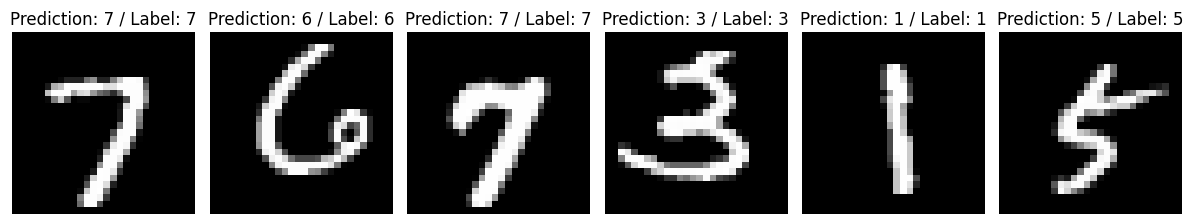

In [168]:
#Displaying random images with their predictions
display_images_with_predictions(X_test, Y_test, predictions)

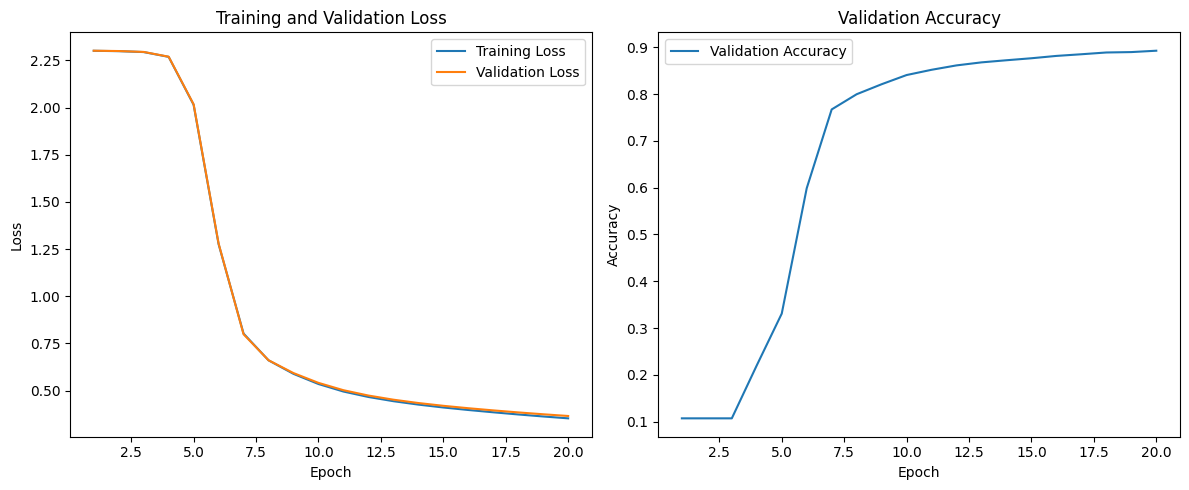

In [169]:
#Ploting the train curves
plot_training_curves(train_losses, val_losses, val_accuracies)